In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [5]:
#entering data
#Only frequency v temp for 3rd node bubbles 

freq = np.array((28086,27102,27332,27479,27272,27374,26964,26770,27087,27141,27403,27300))
temp = np.array((12.2,10.9,8.0,11.2,9.8,10.9,4.7,4.0,7.4,10.3,13.0,7.0))
len(freq)==len(temp) ##Nice

True

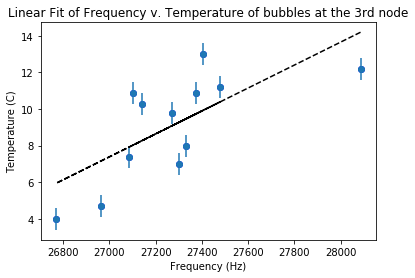

Fit of:
0.006264093795938827 x -161.74171169572796


In [54]:
#Writing the fitter 
fit = np.polyfit(freq, temp,1)
fit_fn = np.poly1d(fit) 

plt.plot(freq, temp, 'bo', freq, fit_fn(freq), '--k')
plt.errorbar(freq, temp, yerr=0.6,fmt='o')
plt.title("Linear Fit of Frequency v. Temperature of bubbles at the 3rd node")
plt.ylabel("Temperature (C)")
plt.xlabel("Frequency (Hz)")
plt.show()

print("Fit of:")
print(fit[0],"x",fit[1])

In [49]:
#Writing a chi2 function to see how bad this actually is 
def chi2(fit,x): 
    chi2 = 0 
    for i in range(len(x)): 
        chi2 += ((x[i]-fit(x[i]))**2)/fit(x[i])
        
    return chi2 

In [50]:
chi2(fit_fn,freq) ##This ain't it chief

1016474793.435501

This is a bad linear fit. From this we can conclude that the relatonship between frequency and temperature is non-linear for sonolumenincing bubbles at the 3rd node. 